In [208]:
import numpy as np
import matplotlib.pyplot as plt

## Make data

In [209]:
def make_data(N, err = 0.1):
    x0 = 0.1 * np.random.randn(1)
    m = np.random.rand(1) * 5
    
    x = np.random.rand(N)
    y = np.sin(1.5 * np.pi * (x - x0))    
    y += err * np.random.randn(N) + m * x
    
    x_true = np.linspace(0,1,100)
    y_true = np.sin(1.5 * np.pi*(x_true - x0)) + m * x_true
    
    x = x[:,np.newaxis]
    x_true = x_true[:,np.newaxis]
    return x,y,x_true,y_true

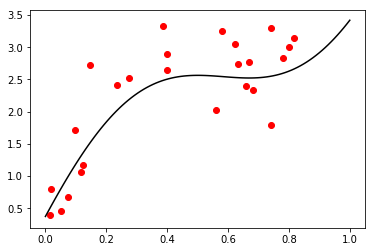

In [210]:
x,y,x_true,y_true = make_data(25,0.5)
plt.plot(x_true,y_true,color='black')
plt.scatter(x,y,color='red')

# Regression

In [211]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.learning_curve import validation_curve
from sklearn.learning_curve import learning_curve

In [212]:
def PolynomialRegression(degree=1,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

(-0.05, 1.05, 0.22242845830273358, 3.5704057061626684)

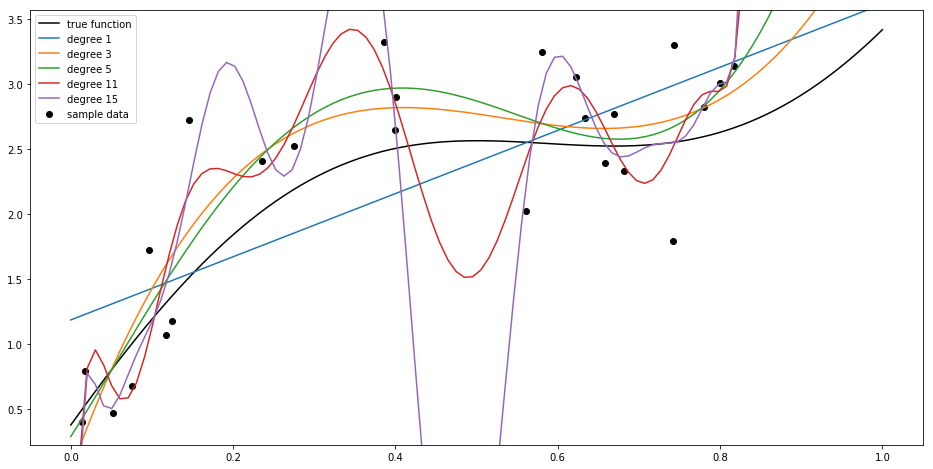

In [213]:
degrees = [1,3,5,11,15]
plt.figure(figsize=(16,8))
plt.plot(x_true, y_true,label = 'true function',color='black')
plt.scatter(x,y,label = 'sample data',color='black')
lim = plt.axis()
for degree in degrees:
    y_pred = PolynomialRegression(degree).fit(x,y).predict(x_true)
    plt.plot(x_true,y_pred,label = 'degree {0}'.format(degree))
plt.legend(loc='best')
plt.axis(lim)

### Validation Curve

Text(0,0.5,'score')

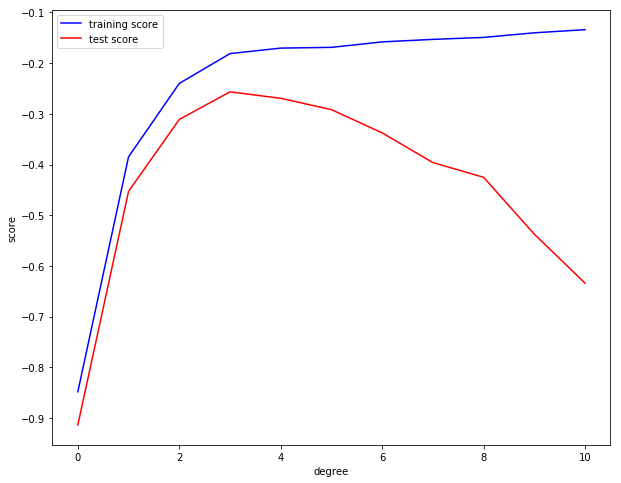

In [214]:
degree_range = np.arange(0,11)
train_score,test_score = validation_curve(PolynomialRegression(),x,y,
                                         'polynomialfeatures__degree',degree_range,
                                         cv = 7,
                                         scoring = 'neg_mean_squared_error')
plt.figure(figsize=(10,8))
plt.plot(np.mean(train_score,1),color='blue',label='training score')
plt.plot(np.mean(test_score,1),color='red',label='test score')
plt.legend(loc='best')
plt.xlabel('degree')
plt.ylabel('score')

### Learning Curve

In [215]:
def plot_learning_curve(train_size,train_score,val_score):
    plt.plot(train_size,train_score,color='blue',label='training score')
    plt.plot(train_size,val_score,color='red',label='validation score')
    plt.hlines(np.mean([train_score[-1],val_score[-1]]),train_size[0],train_size[-1],
                        color='gray',linestyle='dashed')
    plt.ylim(0,1)
    plt.xlim(train_size[0],train_size[-1])
    plt.xlabel('training size')
    plt.ylabel('score')
    plt.legend(loc='best')

In [ ]:
degrees = [2,3,9]

x_test,y_test,_,_ = make_data(100)
plt.figure(figsize=(15,5))
for i,deg in enumerate(degrees):
    train_size,train_score,val_score = learning_curve(PolynomialRegression(deg),
                                                      x_test,y_test,cv=7,
                                                      train_sizes=np.linspace(0.3,1,30))    
    plt.subplot(1,len(degrees),i+1)
    plt.title('degree = ' + str(deg))
    plot_learning_curve(train_size,np.mean(train_score,1),np.mean(val_score,1))